# 准备数据

In [1]:
# 过滤Alphalens的warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# 加载模块
import polars as pl

from vnpy.trader.constant import Interval

from vnpy.alpha import AlphaLab

In [3]:
# 创建数据中心
lab: AlphaLab = AlphaLab("./lab/csi300")

In [4]:
# 设置任务参数
name = "300_lasso"
index_symbol: str = "000300.SSE"
start: str = "2008-01-01"
end: str = "2023-12-31"
interval: Interval = Interval.DAILY
extended_days: int = 100

In [5]:
# 加载所有成分股代码
component_symbols: list[str] = lab.load_component_symbols(index_symbol, start, end)

# 特征计算

In [6]:
# 加载模块
from functools import partial

from vnpy.trader.constant import Interval

from vnpy.alpha.dataset import (
    AlphaDataset,
    process_drop_na,
    process_cs_norm,
    process_fill_na
)
from vnpy.alpha.dataset.datasets.alpha_158 import Alpha158

In [7]:
# 加载成分股数据
df: pl.DataFrame = lab.load_bar_df(component_symbols, interval, start, end, extended_days)

In [8]:
df

shape: (2_668_723, 10)
┌────────────┬──────────┬──────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ datetime   ┆ open     ┆ high     ┆ low      ┆ … ┆ turnover   ┆ open_inte ┆ vwap      ┆ vt_symbol │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---        ┆ rest      ┆ ---       ┆ ---       │
│ datetime[μ ┆ f32      ┆ f32      ┆ f32      ┆   ┆ f32        ┆ ---       ┆ f32       ┆ str       │
│ s]         ┆          ┆          ┆          ┆   ┆            ┆ f32       ┆           ┆           │
╞════════════╪══════════╪══════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2020-06-29 ┆ 1.0      ┆ 1.0      ┆ 1.0      ┆ … ┆ 1.0016488e ┆ 0.0       ┆ 63.387676 ┆ 603087.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ E         │
│ 2020-06-30 ┆ 1.100021 ┆ 1.100021 ┆ 1.100021 ┆ … ┆ 2.586737e6 ┆ 0.0       ┆ 69.727829 ┆ 603087.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ E         │
│ 2020-07-01 ┆ 1.210023 ┆ 1.210023 ┆ 1.210023 ┆ … ┆ 3.479036e6 ┆ 0.0       ┆ 76.700615 ┆ 603087.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ E         │
│ 2020-07-02 ┆ 1.330993 ┆ 1.330993 ┆ 1.330993 ┆ … ┆ 5.415205e6 ┆ 0.0       ┆ 84.368599 ┆ 603087.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ E         │
│ 2020-07-03 ┆ 1.464136 ┆ 1.464136 ┆ 1.464136 ┆ … ┆ 1.8420998e ┆ 0.0       ┆ 92.808235 ┆ 603087.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ E         │
│ …          ┆ …        ┆ …        ┆ …        ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 2024-01-04 ┆ 6.277728 ┆ 6.277728 ┆ 6.170449 ┆ … ┆ 7.0059088e ┆ 0.0       ┆ 3.425404  ┆ 000750.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
│ 2024-01-05 ┆ 6.206208 ┆ 6.295698 ┆ 6.152659 ┆ … ┆ 1.03185504 ┆ 0.0       ┆ 3.431763  ┆ 000750.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ SE        │
│ 2024-01-08 ┆ 6.188419 ┆ 6.188419 ┆ 6.063169 ┆ … ┆ 9.1786336e ┆ 0.0       ┆ 3.373142  ┆ 000750.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
│ 2024-01-09 ┆ 6.063169 ┆ 6.134689 ┆ 6.02741  ┆ … ┆ 7.5057784e ┆ 0.0       ┆ 3.350486  ┆ 000750.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
│ 2024-01-10 ┆ 6.045199 ┆ 6.098929 ┆ 6.009439 ┆ … ┆ 5.7553028e ┆ 0.0       ┆ 3.331339  ┆ 000750.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
└────────────┴──────────┴──────────┴──────────┴───┴────────────┴───────────┴───────────┴───────────┘

In [9]:
# 创建数据集对象
dataset: AlphaDataset = Alpha158(
    df,
    train_period = ("2008-01-01", "2014-12-31"),
    valid_period = ("2015-01-01", "2016-12-31"),
    test_period = ("2017-01-01", "2020-8-31"),
)

In [10]:
# 添加数据预处理器
dataset.add_processor("learn", partial(process_drop_na, names=["label"]))
dataset.add_processor("learn", partial(process_cs_norm, names=["label"], method="zscore"))

dataset.add_processor("infer", partial(process_fill_na, fill_value=0))

In [11]:
# 收集指数成分过滤器
filters: dict[str, list[str]] = lab.load_component_filters(index_symbol, start, end)

In [12]:
# 准备特征和标签数据
dataset.prepare_data(filters, max_workers=3)

2025-04-27 17:09:43 开始计算表达式因子特征


100%|██████████| 159/159 [1:09:25<00:00, 26.20s/it]

2025-04-27 18:19:08 开始合并结果数据因子特征



0it [00:00, ?it/s]


2025-04-27 18:19:09 开始筛选成分股数据


100%|██████████| 819/819 [00:12<00:00, 65.96it/s] 


Dropped 7.9% entries from factor data: 0.4% in forward returns computation and 7.5% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std   count    count %
factor_quantile                                                           
1.0              0.000000  0.783112  0.092956  0.131674  184950  10.066829
2.0              0.000571  0.849006  0.241238  0.181803  183717   9.999717
3.0              0.010751  0.886968  0.321493  0.204981  183113   9.966841
4.0              0.016062  0.914302  0.388084  0.216525  183652   9.996179
5.0              0.027016  0.936739  0.450755  0.221089  183942  10.011964
6.0              0.047668  0.954686  0.514236  0.219329  182906   9.955574
7.0              0.071943  0.967680  0.581941  0.210960  183332   9.978761
8.0              0.101998  0.980325  0.659179  0.193255  183400   9.982463
9.0              0.148624  0.998517  0.752256  0.162709  183429   9.984041
10.0             0.234618  1.000000  0.888935  0.113950  184781  10.057630

Returns Analysis


1D     5D    10D
Ann. alpha                                      0.100 -0.035 -0.002
beta                                            0.024  0.024  0.032
Mean Period Wise Return Top Quantile (bps)     15.207  2.035  3.604
Mean Period Wise Return Bottom Quantile (bps)  -4.979  0.341  1.359
Mean Period Wise Spread (bps)                  20.186  1.709  2.421

<Figure size 640x480 with 0 Axes>

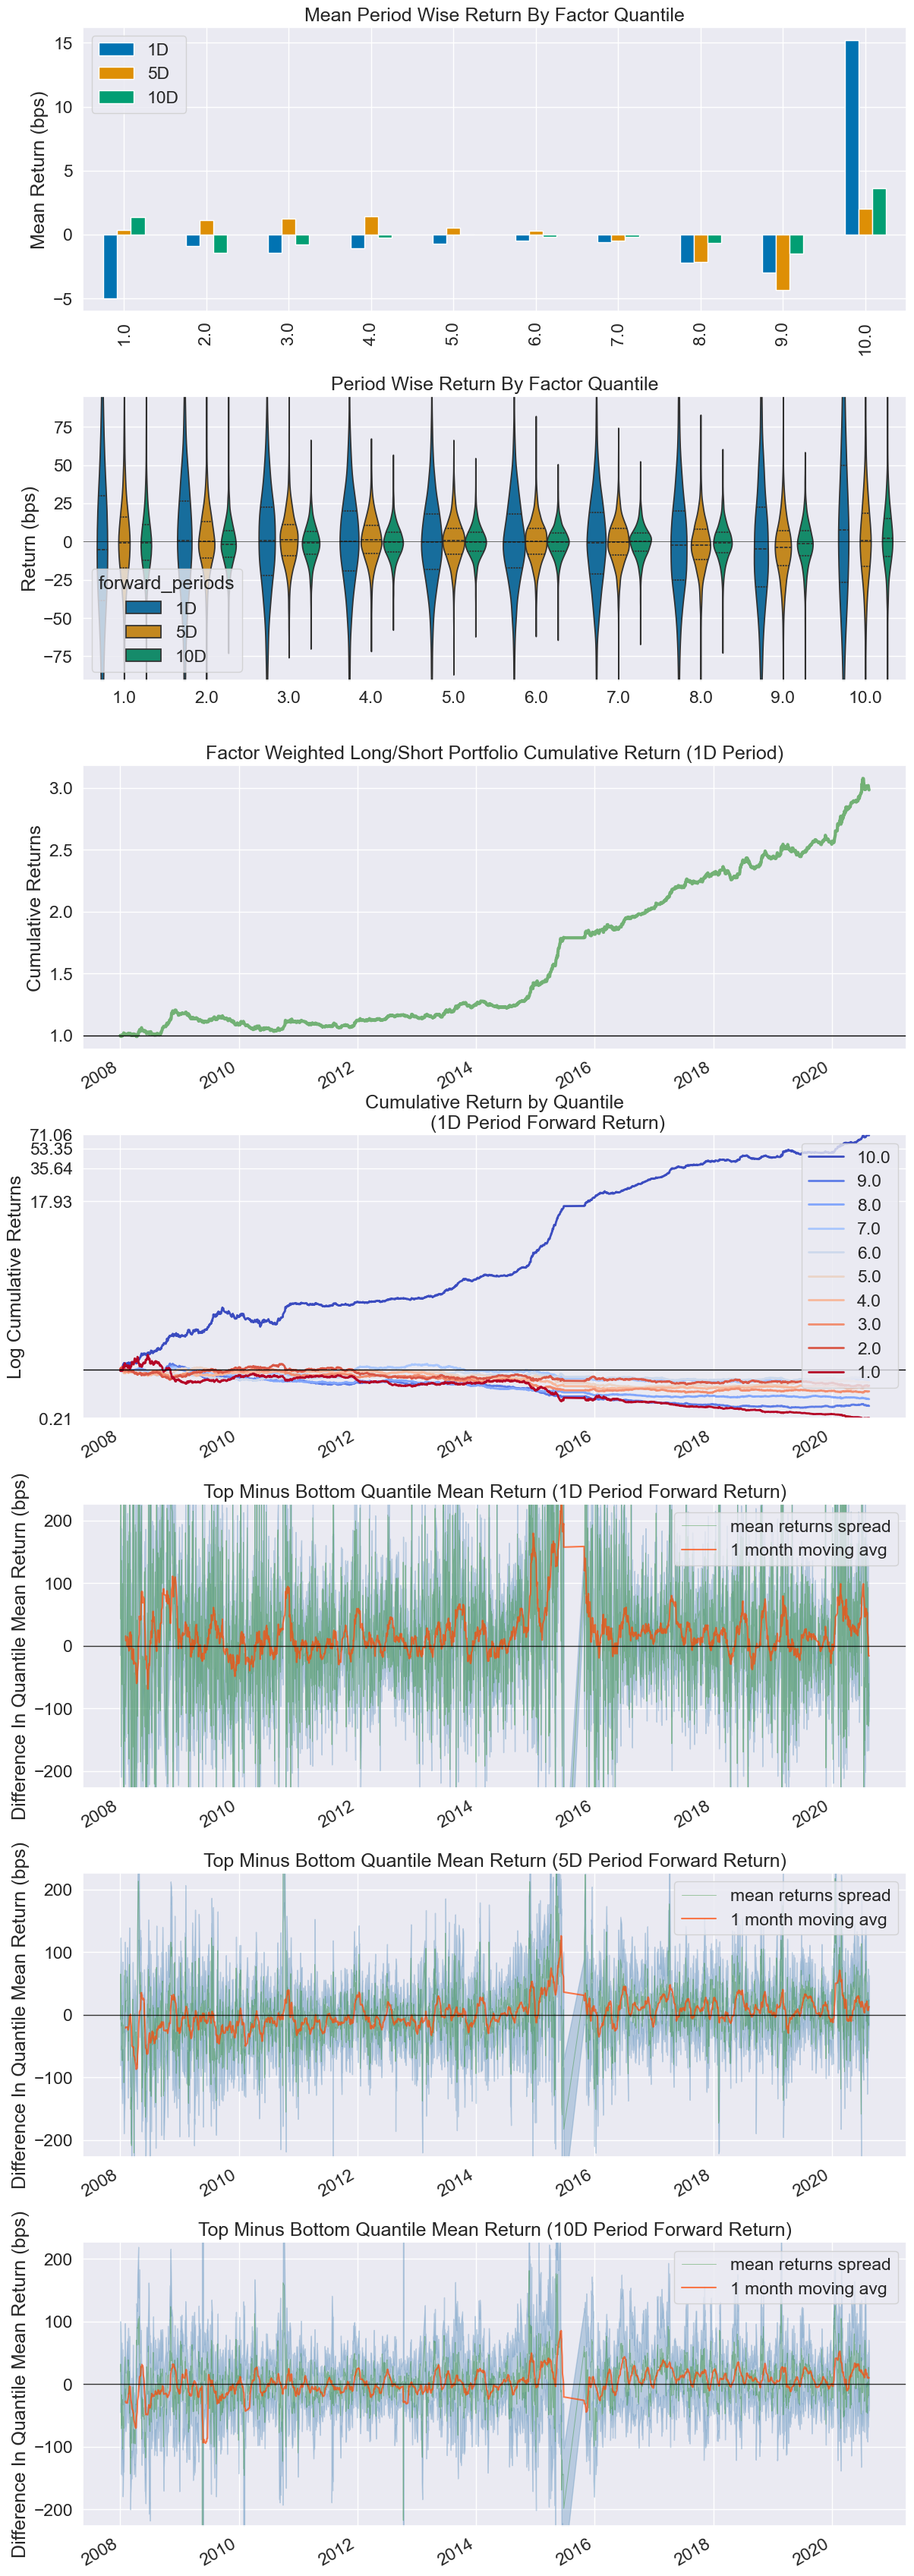

Information Analysis


1D     5D    10D
IC Mean          -0.029 -0.031 -0.005
IC Std.           0.137  0.129  0.128
Risk-Adjusted IC -0.209 -0.237 -0.038
t-stat(IC)          NaN    NaN    NaN
p-value(IC)         NaN    NaN    NaN
IC Skew             NaN    NaN    NaN
IC Kurtosis         NaN    NaN    NaN

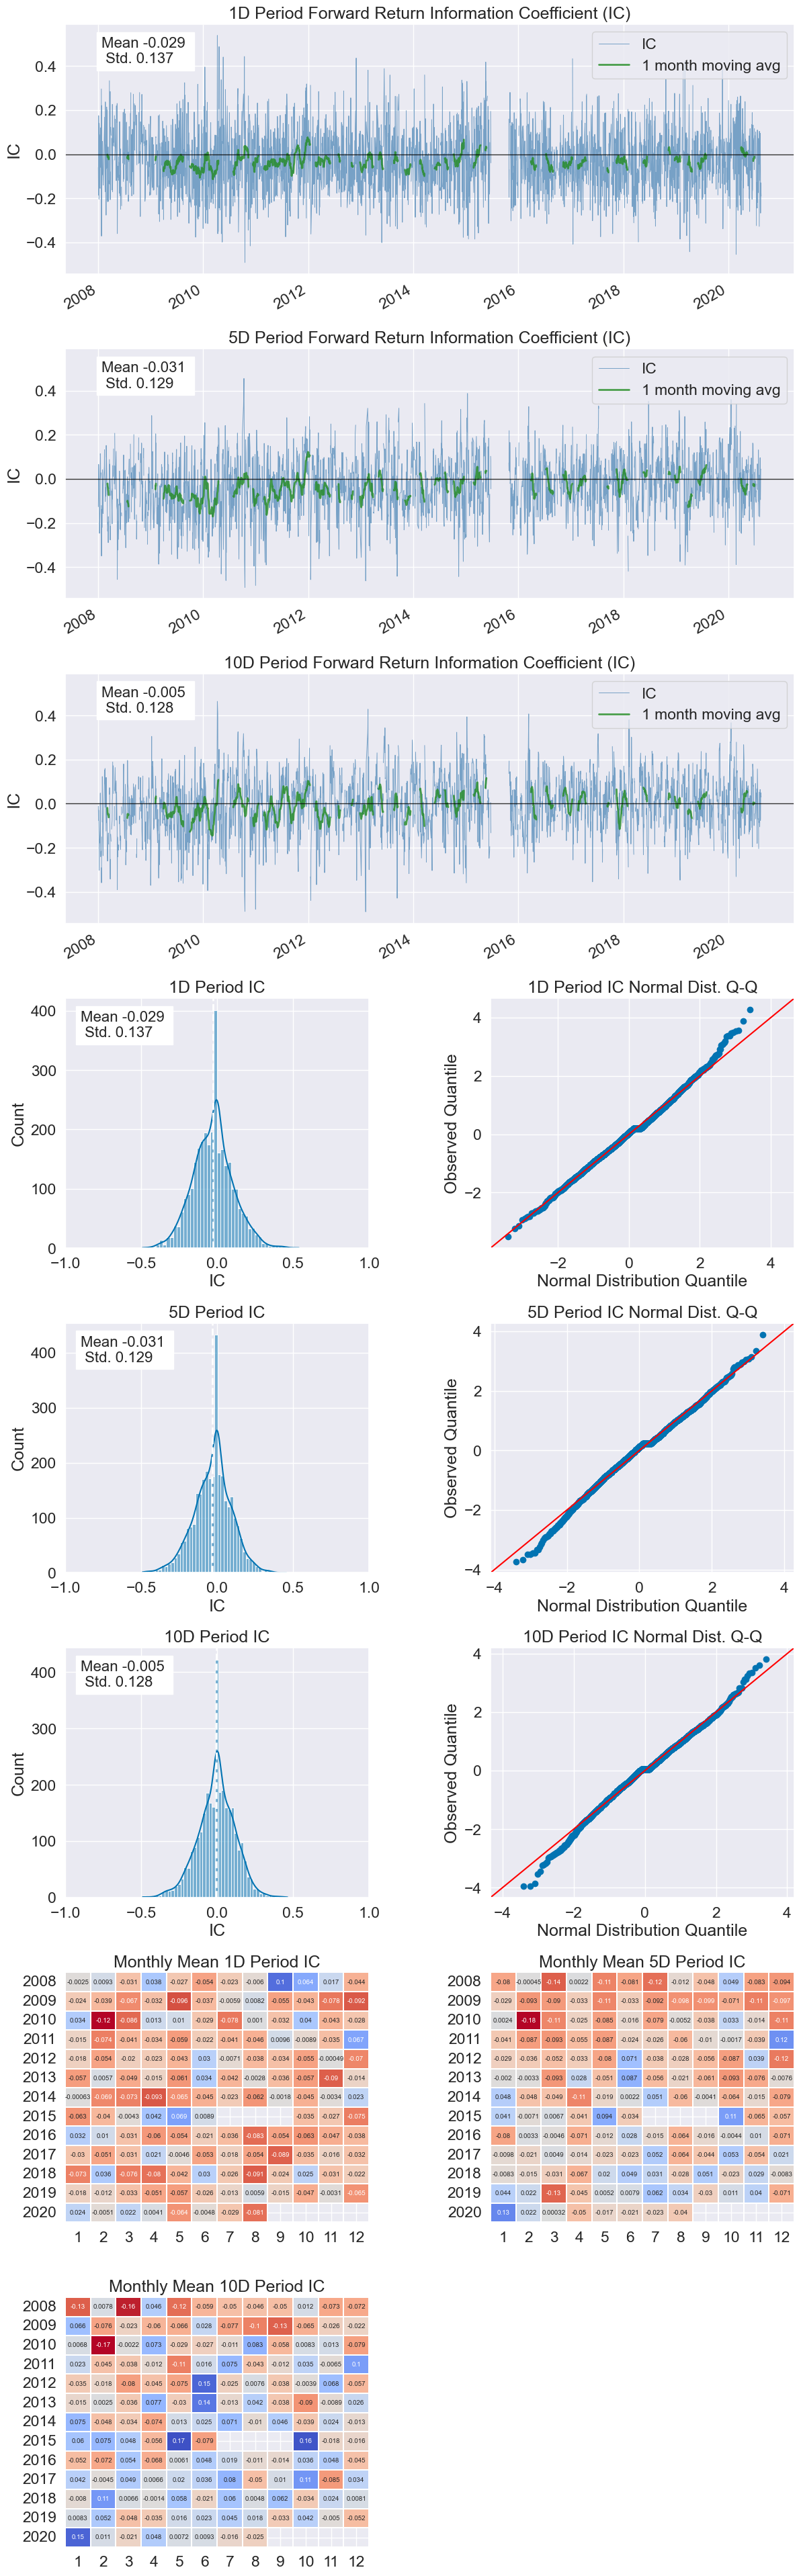

c:\veighna_studi\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1.0 Mean Turnover    0.470  0.660  0.674
Quantile 2.0 Mean Turnover    0.752  0.906  0.892
Quantile 3.0 Mean Turnover    0.818  0.899  0.894
Quantile 4.0 Mean Turnover    0.845  0.894  0.893
Quantile 5.0 Mean Turnover    0.856  0.891  0.894
Quantile 6.0 Mean Turnover    0.860  0.896  0.895
Quantile 7.0 Mean Turnover    0.853  0.897  0.897
Quantile 8.0 Mean Turnover    0.835  0.899  0.896
Quantile 9.0 Mean Turnover    0.794  0.901  0.892
Quantile 10.0 Mean Turnover   0.673  0.893  0.885

1D     5D    10D
Mean Factor Rank Autocorrelation  0.605  0.038  0.083

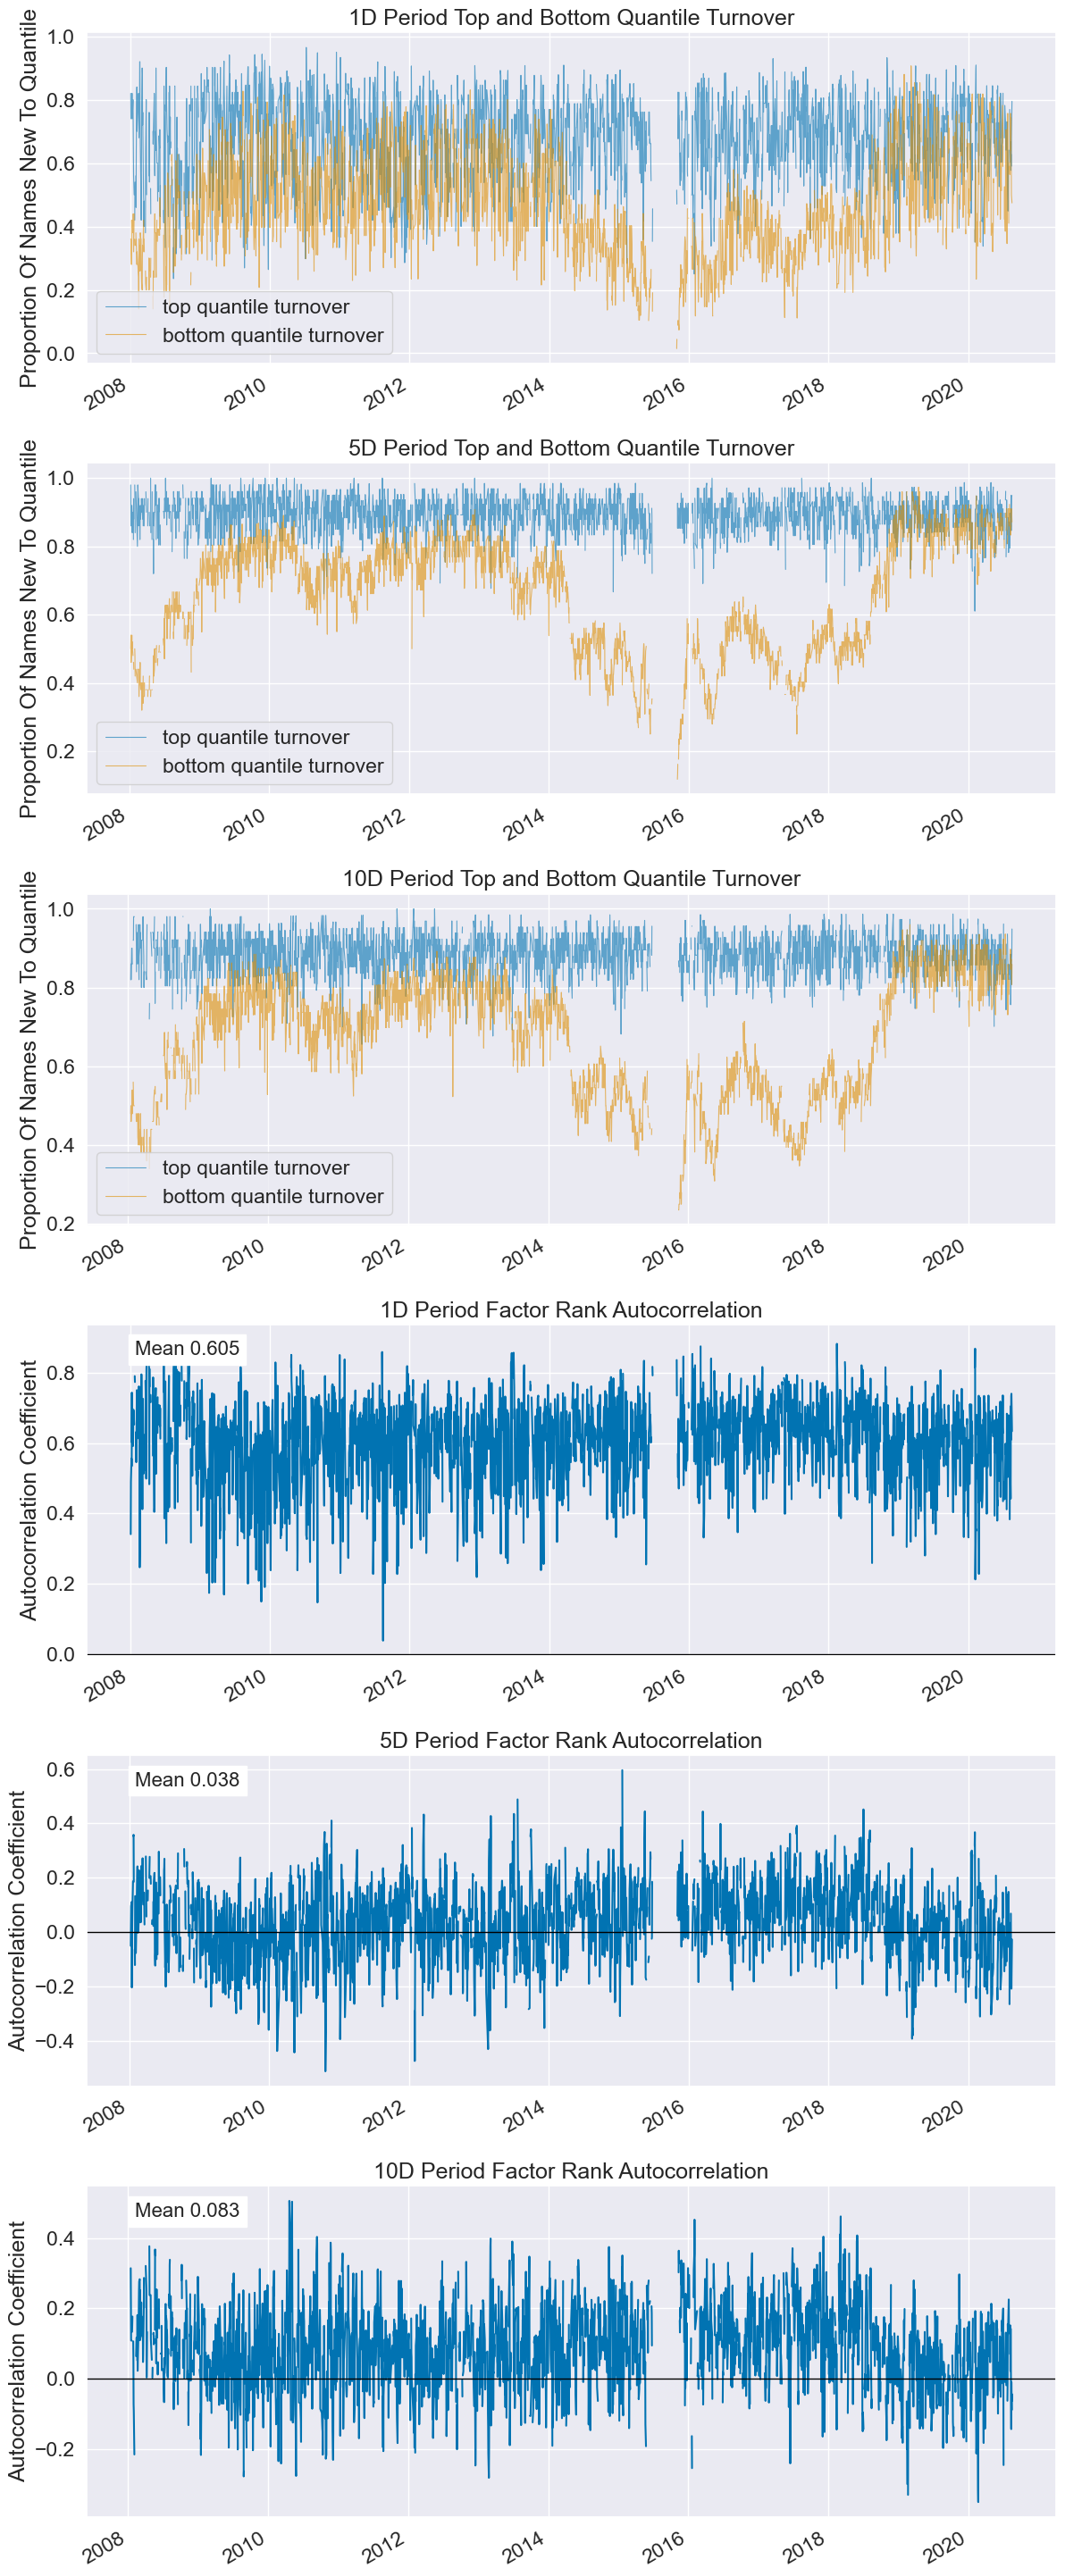

In [13]:
# 特征表现分析
dataset.show_feature_performance("rsv_5")

In [14]:
# 保存到文件缓存
lab.save_dataset(name, dataset)

# 模型训练

In [15]:
# 加载模块
import numpy as np

from vnpy.alpha import Segment, AlphaDataset, AlphaModel

from vnpy.alpha.model.models.lasso_model import LassoModel

In [16]:
# 从文件缓存加载
dataset: AlphaDataset = lab.load_dataset(name)

In [17]:
# 创建模型对象
model: AlphaModel = LassoModel()

In [18]:
# 使用数据集训练模型
model.fit(dataset)

c:\veighna_studi\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+05, tolerance: 6.548e+01
  model = cd_fast.enet_coordinate_descent(


In [19]:
# 查看模型细节
model.detail()

2025-04-27 18:21:26 LASSO模型特征总数量: 32
2025-04-27 18:21:26 roc_30: 0.196119
2025-04-27 18:21:26 ma_5: -0.122391
2025-04-27 18:21:26 rsv_30: 0.084225
2025-04-27 18:21:26 rank_10: -0.073066
2025-04-27 18:21:26 klow_2: -0.069287
2025-04-27 18:21:26 rank_5: -0.043487
2025-04-27 18:21:26 rsv_20: 0.041246
2025-04-27 18:21:26 rank_60: 0.036126
2025-04-27 18:21:26 imxd_5: -0.036111
2025-04-27 18:21:26 qtld_5: -0.035603
2025-04-27 18:21:26 max_60: 0.033530
2025-04-27 18:21:26 imax_30: -0.028560
2025-04-27 18:21:26 rsqr_5: -0.027065
2025-04-27 18:21:26 sumd_30: 0.025879
2025-04-27 18:21:26 rsqr_10: -0.021730
2025-04-27 18:21:26 ksft_2: -0.016907
2025-04-27 18:21:26 rsv_10: 0.015567
2025-04-27 18:21:26 wvma_30: -0.013823
2025-04-27 18:21:26 rsqr_30: -0.011606
2025-04-27 18:21:26 wvma_60: -0.011187
2025-04-27 18:21:26 imin_10: 0.010015
2025-04-27 18:21:26 imxd_60: 0.008658
2025-04-27 18:21:26 wvma_20: -0.007735
2025-04-27 18:21:26 sumd_10: 0.006429
2025-04-27 18:21:26 sumd_60: 0.005958
2025-04-27 18

In [20]:
# 保存模型
lab.save_model(name, model)

# 预测信号

In [21]:
model: AlphaModel = lab.load_model(name)

In [22]:
# 用模型在测试集上预测
pre: np.ndarray = model.predict(dataset, Segment.TEST)

# 加载测试集数据
df_t: pl.DataFrame = dataset.fetch_infer(Segment.TEST)

# 合并预测信号列
df_t = df_t.with_columns(pl.Series(pre).alias("signal"))

# 提取信号数据
signal: pl.DataFrame = df_t["datetime", "vt_symbol", "signal"]

Dropped 1.1% entries from factor data: 1.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std  count  count %
factor_quantile                                                        
1               -0.701464  0.013617 -0.077040  0.028492  26460     10.0
2               -0.123846  0.035885 -0.047825  0.022971  26460     10.0
3               -0.106093  0.046205 -0.032916  0.023173  26460     10.0
4               -0.093724  0.053539 -0.021213  0.023445  26460     10.0
5               -0.081672  0.061714 -0.010732  0.023519  26460     10.0
6               -0.072943  0.070816 -0.000576  0.023502  26460     10.0
7               -0.064337  0.082729  0.009916  0.023242  26460     10.0
8               -0.053727  0.090845  0.021432  0.022760  26460     10.0
9               -0.043023  0.104942  0.035928  0.022242  26460     10.0
10              -0.032516  0.663562  0.064591  0.032359  26460     10.0

Returns Analysis


1D      5D    10D
Ann. alpha                                      0.172   0.130  0.073
beta                                            0.042   0.047  0.035
Mean Period Wise Return Top Quantile (bps)      9.378   8.154  5.558
Mean Period Wise Return Bottom Quantile (bps) -12.738  -7.624 -4.150
Mean Period Wise Spread (bps)                  22.116  15.775  9.715

<Figure size 640x480 with 0 Axes>

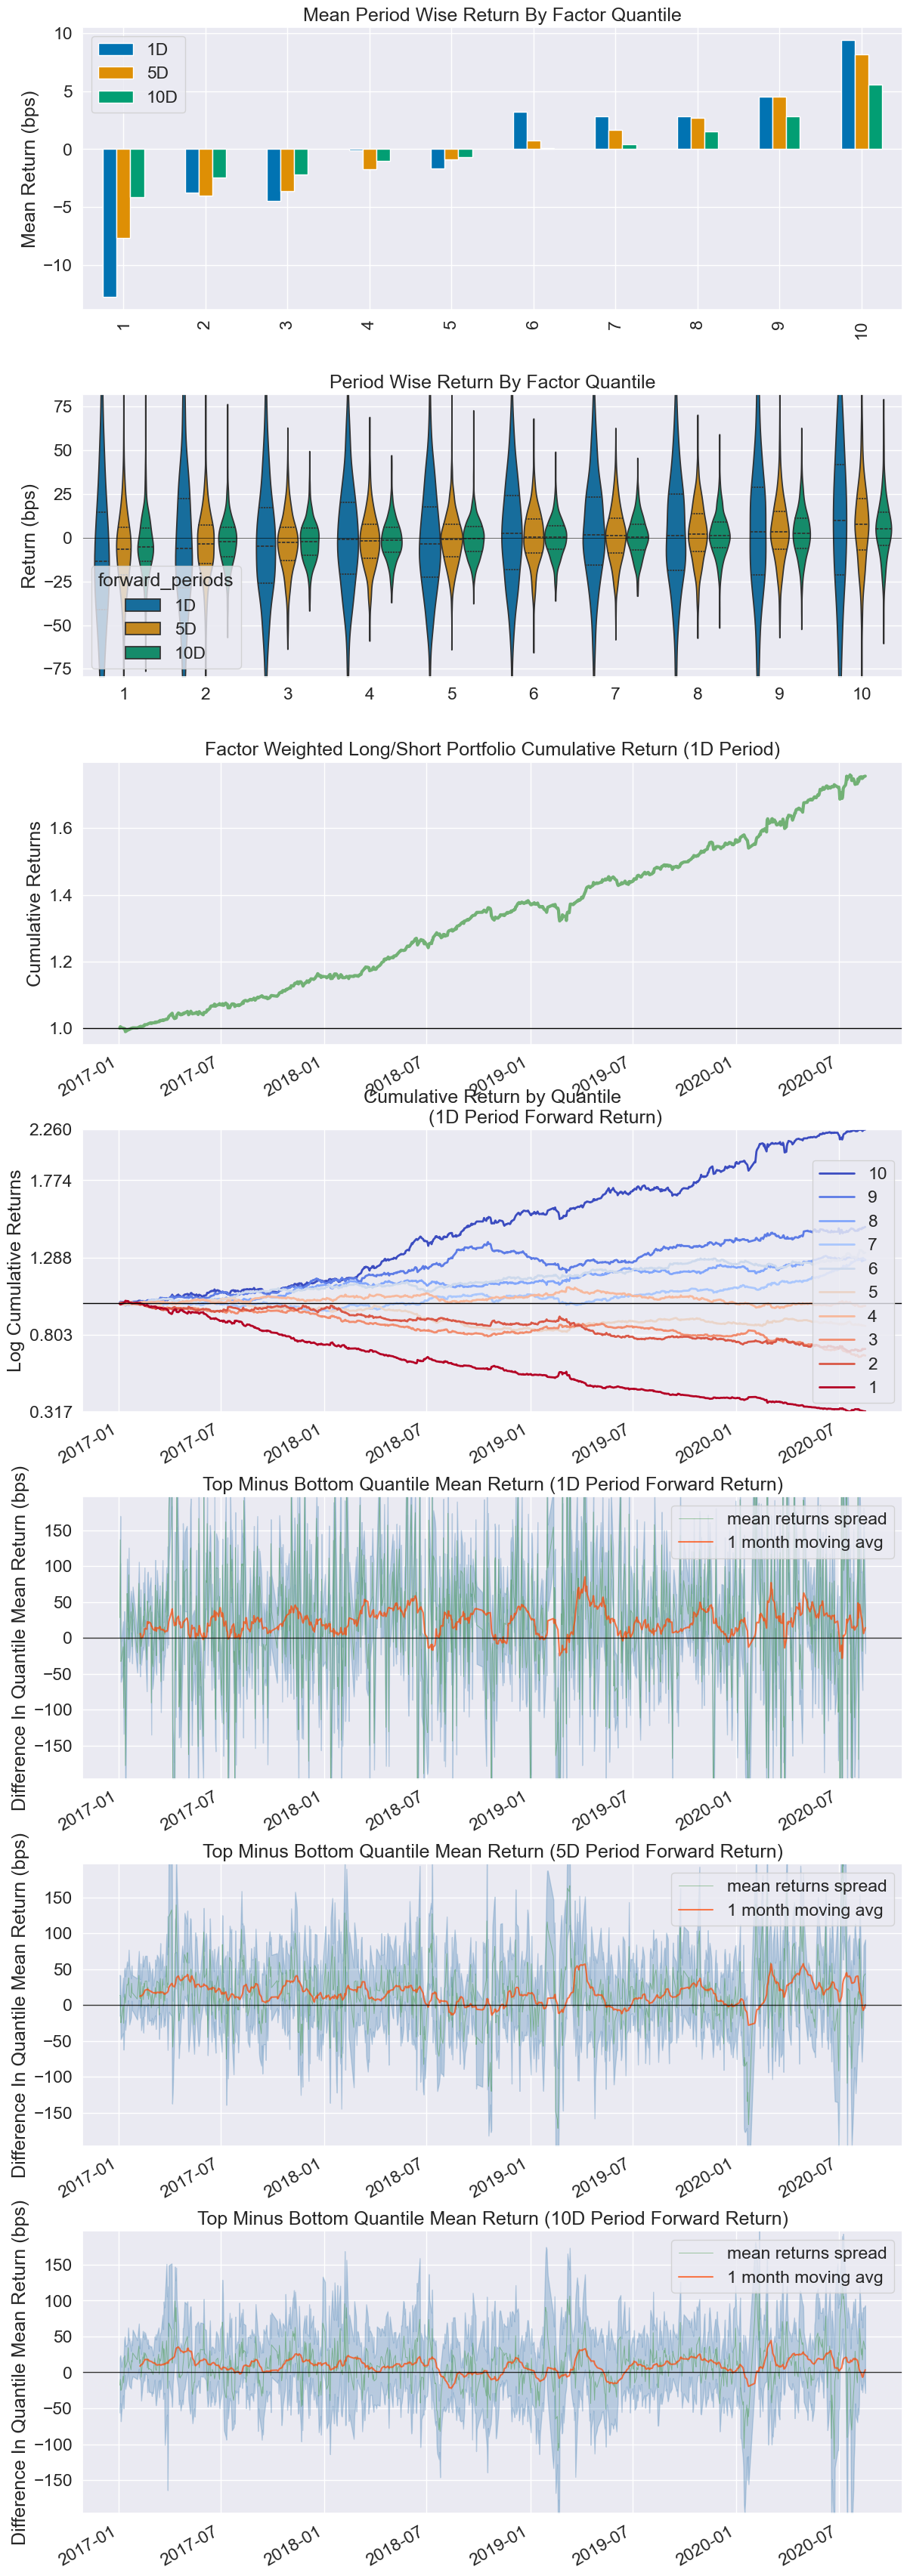

Information Analysis


1D      5D     10D
IC Mean            0.048   0.053   0.045
IC Std.            0.136   0.135   0.130
Risk-Adjusted IC   0.353   0.392   0.344
t-stat(IC)        10.493  11.629  10.208
p-value(IC)        0.000   0.000   0.000
IC Skew            0.041   0.149   0.107
IC Kurtosis        0.209   0.408   0.533

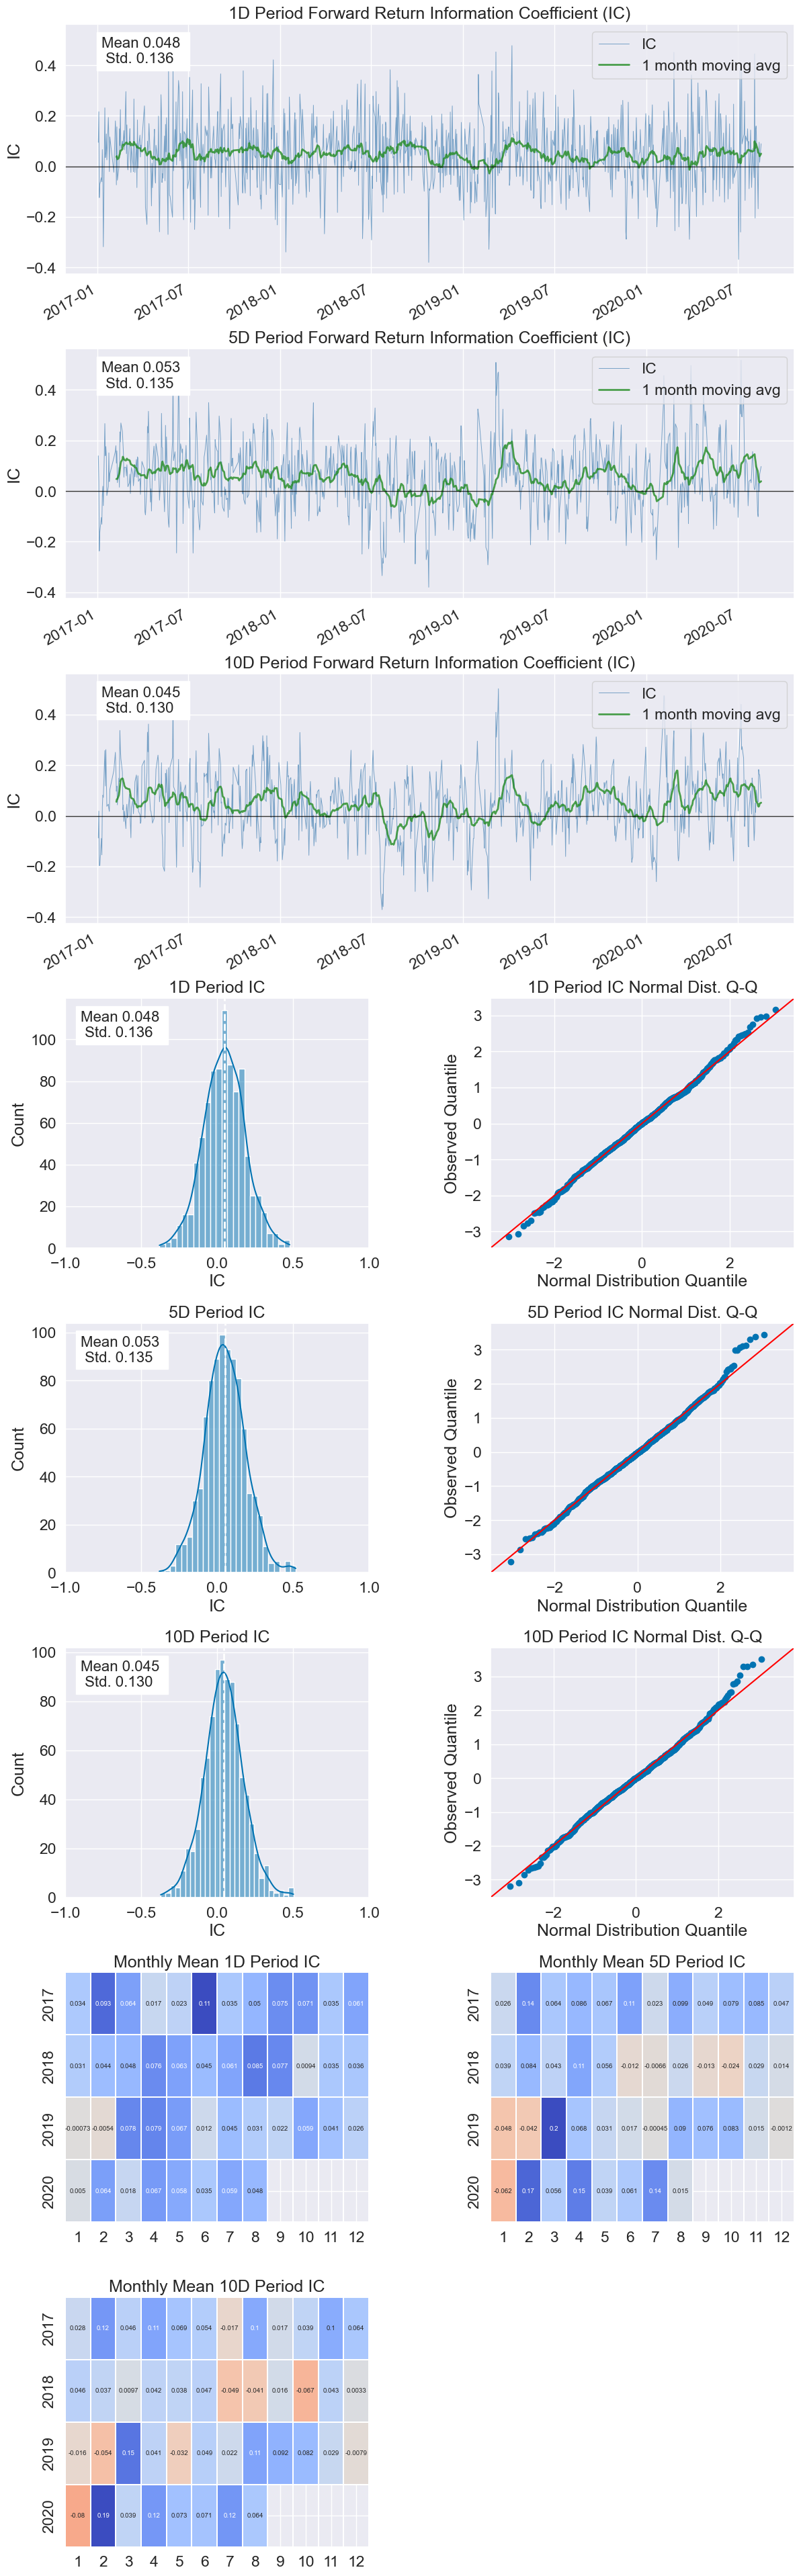

c:\veighna_studi\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover    0.581  0.811  0.838
Quantile 2 Mean Turnover    0.799  0.885  0.893
Quantile 3 Mean Turnover    0.846  0.893  0.897
Quantile 4 Mean Turnover    0.857  0.898  0.896
Quantile 5 Mean Turnover    0.867  0.898  0.899
Quantile 6 Mean Turnover    0.867  0.896  0.899
Quantile 7 Mean Turnover    0.859  0.894  0.894
Quantile 8 Mean Turnover    0.837  0.888  0.893
Quantile 9 Mean Turnover    0.792  0.880  0.880
Quantile 10 Mean Turnover   0.588  0.825  0.848

1D     5D    10D
Mean Factor Rank Autocorrelation  0.594  0.173  0.116

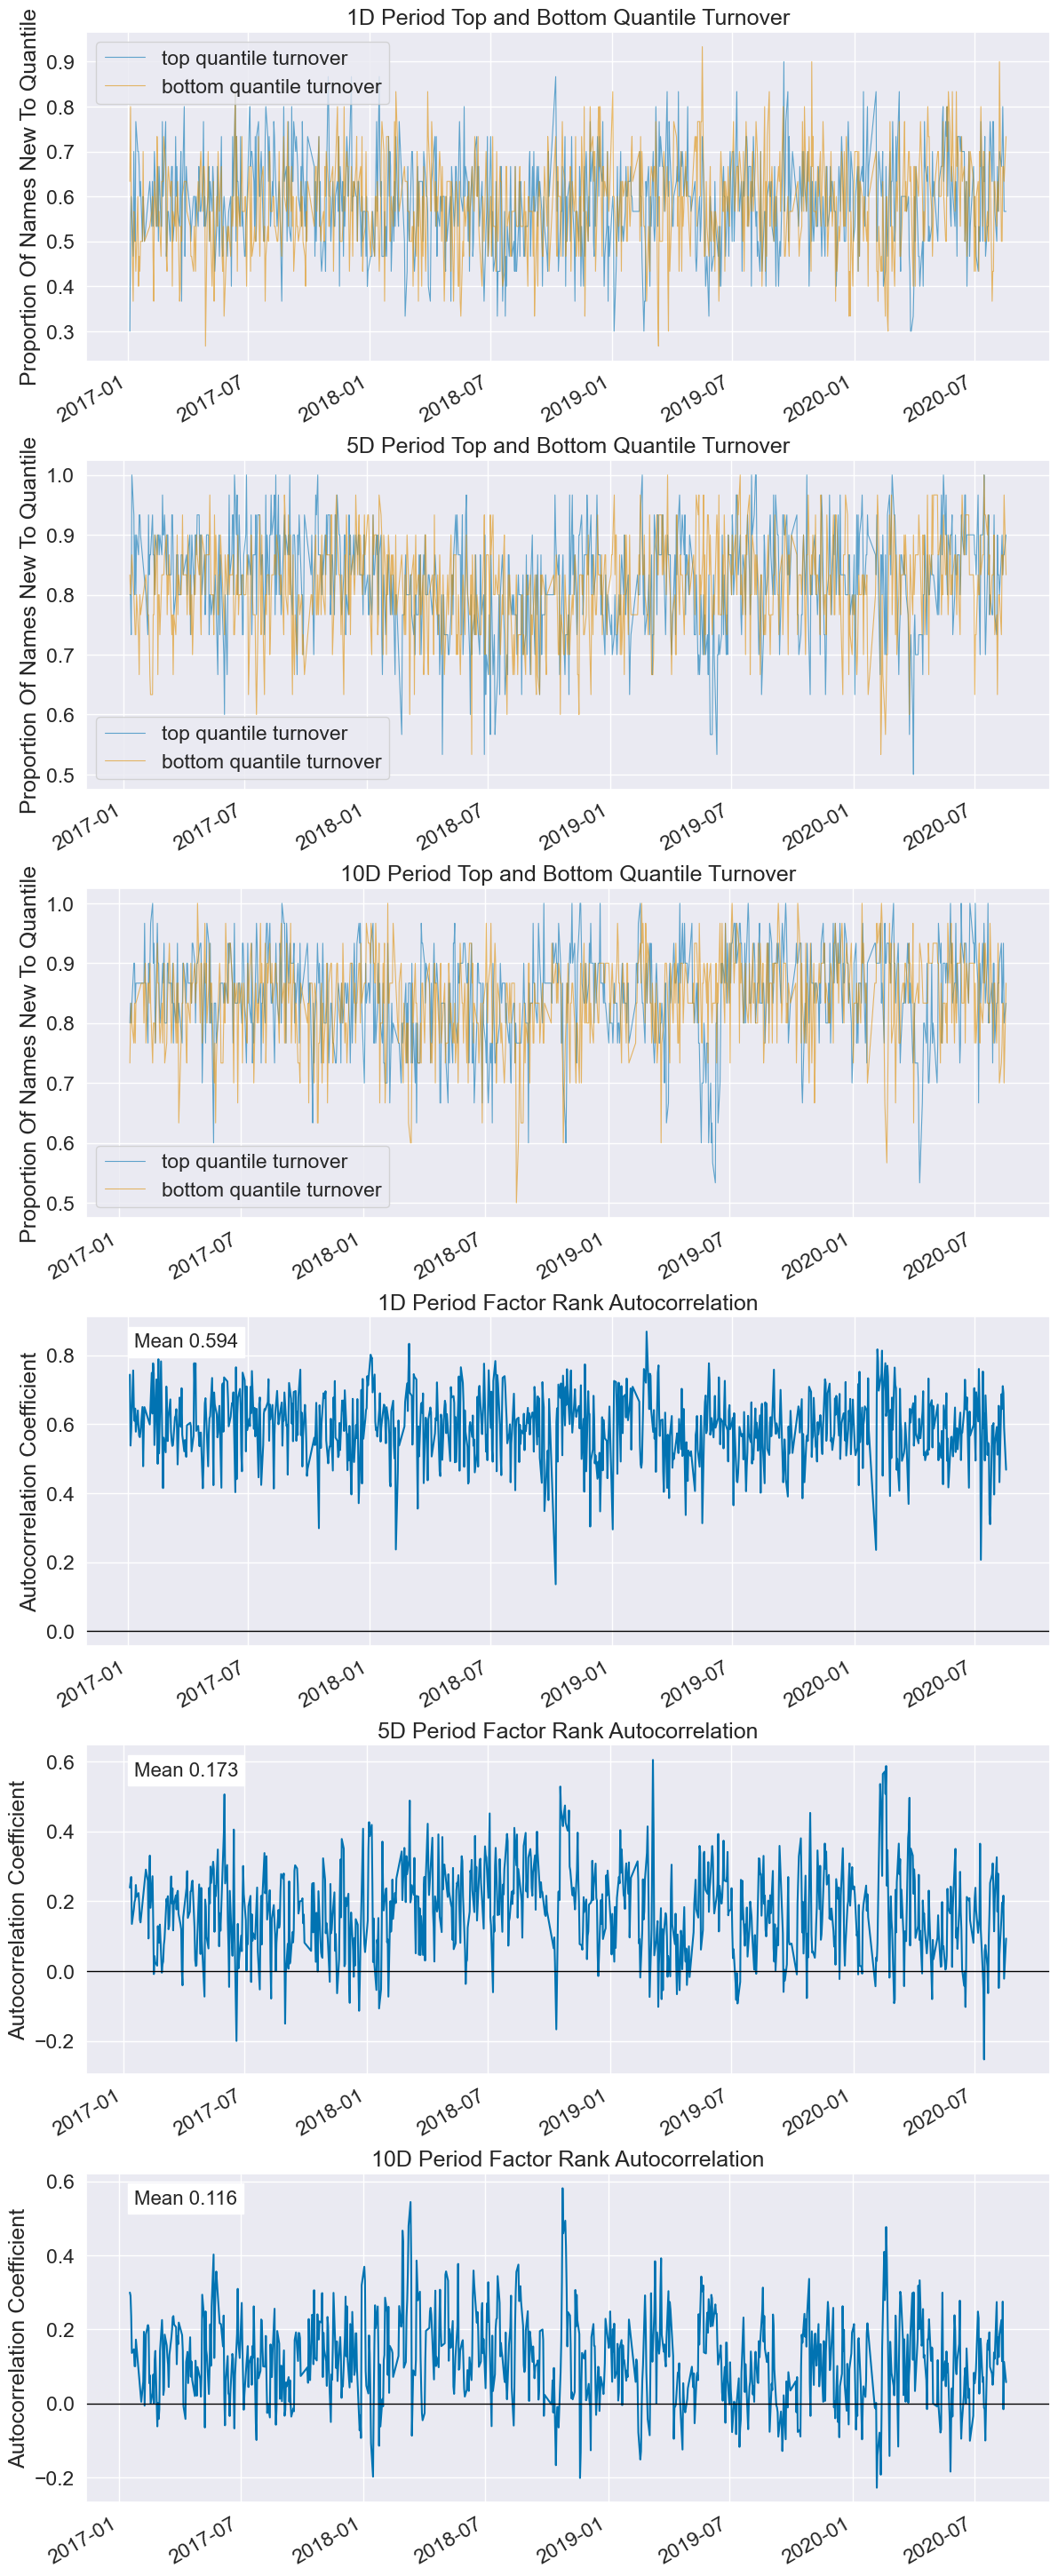

In [23]:
# 检查信号绩效
dataset.show_signal_performance(signal)

In [24]:
# 保存信号数据
lab.save_signal(name, signal)

# 策略回测

In [25]:
# 加载模块
import importlib
from datetime import datetime

from vnpy.alpha.strategy import BacktestingEngine

import vnpy.alpha.strategy.strategies.equity_demo_strategy as equity_demo_strategy

In [26]:
# 重载策略类
importlib.reload(equity_demo_strategy)
EquityDemoStrategy = equity_demo_strategy.EquityDemoStrategy

In [27]:
# 从文件加载信号数据
signal = lab.load_signal(name)

In [28]:
# 创建回测引擎对象
engine = BacktestingEngine(lab)

# 设置回测参数
engine.set_parameters(
    vt_symbols=component_symbols,
    interval=Interval.DAILY,
    start=datetime(2017, 1, 1),
    end=datetime(2020, 8, 1),
    capital=100000000
)

# 添加策略实例
setting = {"top_k": 30, "n_drop": 3, "hold_thresh": 3}
engine.add_strategy(EquityDemoStrategy, setting, signal)

In [29]:
# 执行回测任务
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2025-04-27 18:21:39 开始加载历史数据


100%|██████████| 819/819 [00:04<00:00, 165.50it/s]

2025-04-27 18:21:44 部分合约历史数据为空：['600591.SSE', '001289.SZSE', '600941.SSE', '688303.SSE', '300999.SZSE', '688065.SSE', '600905.SSE', '300919.SZSE', '600102.SSE', '300979.SZSE', '601868.SSE', '600786.SSE', '000562.SZSE', '301269.SZSE', '688187.SSE', '000527.SZSE', '300896.SZSE', '000024.SZSE', '688041.SSE', '688271.SSE', '688223.SSE', '600001.SSE', '601299.SSE', '600832.SSE', '601268.SSE', '605117.SSE', '601059.SSE', '300866.SZSE', '601995.SSE', '300888.SZSE', '300957.SZSE', '600357.SSE', '600938.SSE', '601825.SSE', '600631.SSE', '601728.SSE', '605499.SSE', '600087.SSE']
2025-04-27 18:21:44 所有历史数据加载完成
2025-04-27 18:21:44 策略初始化完成
2025-04-27 18:21:44 开始回放历史数据


2025-04-27 18:21:47 历史数据回放结束
2025-04-27 18:21:47 开始计算逐日盯市盈亏
2025-04-27 18:21:48 逐日盯市盈亏计算完成
2025-04-27 18:21:48 开始计算策略统计指标
2025-04-27 18:21:48 ------------------------------
2025-04-27 18:21:48 首个交易日：  2017-01-03
2025-04-27 18:21:48 最后交易日：  2020-07-31
2025-04-27 18:21:48 总交易日：  871
2025-04-27 18:21:48 盈利交易日：  477
2025-04-27 18:21:48 亏损交易日：  393
2025-04-27 18:21:48 起始资金：  100,000,000.00
2025-04-27 18:21:48 结束资金：  198,617,330.09
2025-04-27 18:21:48 总收益率：  98.62%
2025-04-27 18:21:48 年化收益：  27.17%
2025-04-27 18:21:48 最大回撤:   -38,100,310.19
2025-04-27 18:21:48 百分比最大回撤: -28.41%
2025-04-27 18:21:48 最长回撤天数:   267
2025-04-27 18:21:48 总盈亏：  98,617,330.09
2025-04-27 18:21:48 总手续费：  30,186,395.36
2025-04-27 18:21:48 总成交金额：  20,124,263,575.94
2025-04-27 18:21:48 总成交笔数：  4955
2025-04-27 18:21:48 日均盈亏：  113,223.11
2025-04-27 18:21:48 日均手续费：  34,657.17
2025-04-27 18:21:48 日均成交金额：  23,104,780.22
2025-04-27 18:21:48 日均成交笔数：  5.6888633754305395
2025-04-27 18:21:48 日均收益率：  0.09%
2025-04-27 18:21:48 收益标准差： 

In [30]:
# 显示超额收益分析结果
engine.show_performance(benchmark_symbol=index_symbol)